In [1]:
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from keras.preprocessing import image
from keras.models import Model

import cv2
import time 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
img_width, img_height = 150, 150
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [3]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
vgg_layers = [ layer.name for layer in base_model.layers]
print(vgg_layers)

['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


In [29]:
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    print("{} {} {}".format(height, width, depth))
    nb_plot = int(np.rint(np.sqrt(depth)))
    fig = plt.figure(figsize=(15, 15))
    for i in range(nb_plot*nb_plot):
        if i > (depth-1) : break
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
    plt.savefig('CNN_simple.jpg')

75 75 128


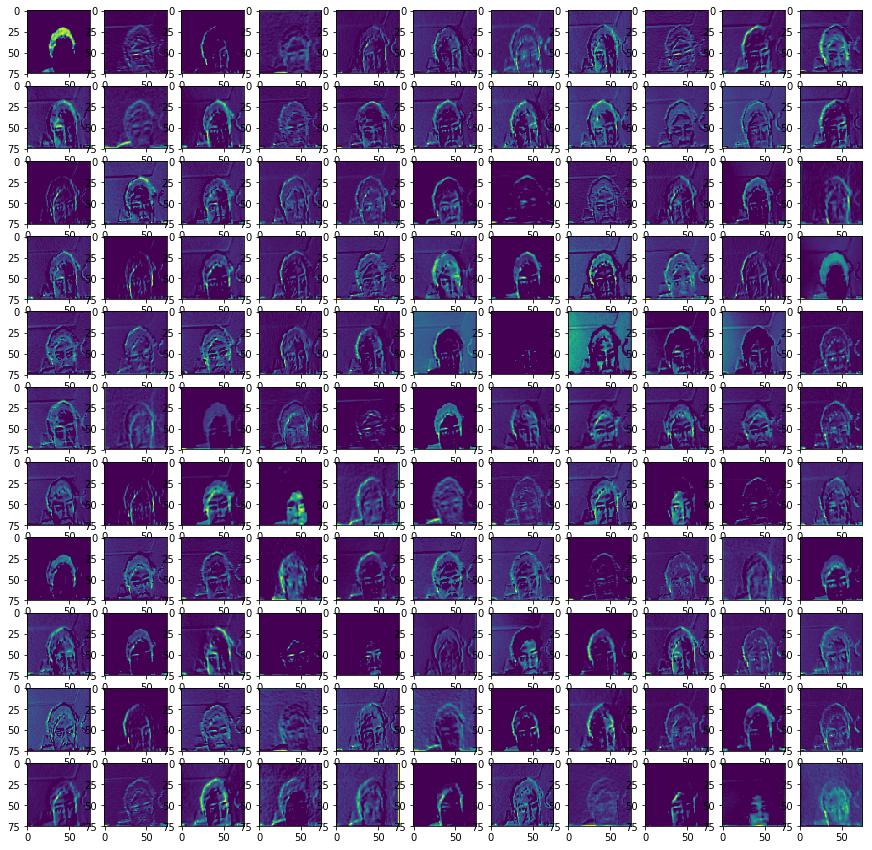

In [30]:
video_capture = cv2.VideoCapture(0)
video_capture.set(3, 800) #WIDTH
video_capture.set(4, 800) #HEIGHT
layer_viz = 'block2_conv1'
while True:
    ret, frame = video_capture.read()
    img = cv2.resize(frame, (img_width , img_height))
    img_ = np.expand_dims(img, 0)
    img_ = preprocess_input(img_)
    _ = base_model.predict(img_)

    layer_pool_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_viz).output)
    layer_pool_featres = layer_pool_extractor.predict(img_)
    plot_feature_maps(layer_pool_featres[0])
    
    #capture feed breaks after 1 frame. U can run the feed indefinitely and break .
    #optimization will be needed to skip VideoCapture Buffer will processing. 
    #you can set the frame buffer to 1 or 2 to achieve this.
    #if cv2.waitKey(1) & 0xFF == ord('q'): break

    break

#release the capture
video_capture.release()
cv2.destroyAllWindows()